## PropTech Through the Ages

### Professor Timothy H. Savage, Ph.D. CRE

#### NYU Schack Institute of Real Estate

#### Faculty Director | CREFC Center for Real Estate Finance at NYU Schack

#### Faculty Coordinator | Data Analtyics

#### Distinguished Fellow | NAIOP Research Foundation

In [1]:
%pylab inline
from IPython.display import Image
import urllib.request as url
import io
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels as sm
import statsmodels.formula.api as smf
import statsmodels.api as sma
import patsy
from statsmodels.graphics.api import abline_plot
import numpy.linalg as linalg
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets
from tabulate import tabulate
sns.set(context='notebook', style='whitegrid', palette='deep', font='sans-serif', font_scale=1, rc=None)

import datetime as dt
from fredapi import Fred
fred = Fred(api_key='30e6ecb242a73869e11cb35f6aa3afc3')

Populating the interactive namespace from numpy and matplotlib


## In CRE, What Are the Important Features to Measure?

* Rent
* Vacancy
* Value $\approx$ capitalization rate

In [2]:
cap_rates = pd.read_csv('nyc.csv', index_col='Time')

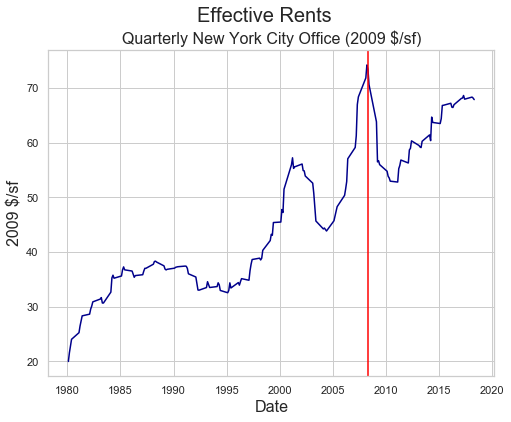

In [3]:
plt.figure(figsize = (8, 6))
plt.suptitle("Effective Rents", fontsize=20)
plt.title("Quarterly New York City Office (2009 $/sf)", fontsize=16)
plt.plot(cap_rates['TW Rent Index ($/sf)'], color='darkblue')
plt.xlabel('Date', fontsize=16)
plt.ylabel('2009 $/sf', fontsize=16)
plt.axvline(2008.3, color="red")

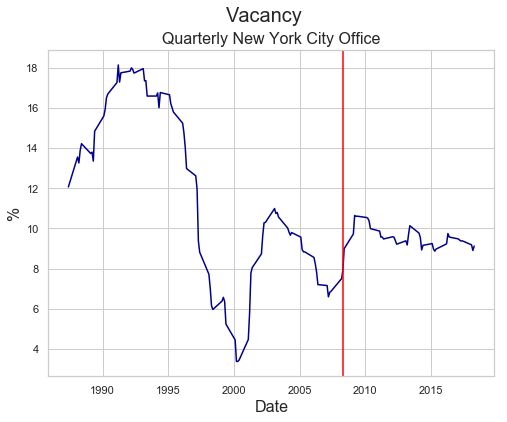

In [4]:
plt.figure(figsize = (8, 6))
plt.suptitle("Vacancy", fontsize=20)
plt.title("Quarterly New York City Office", fontsize=16)
plt.plot(cap_rates['Vacancy Rate (%)'], color='darkblue')
plt.xlabel('Date', fontsize=16)
plt.ylabel('%', fontsize=16)
plt.axvline(2008.3, color="red")

In [5]:
cap_rates = pd.read_excel("cap rates.xls", index_col='Date')
cap_rates = cap_rates.drop(['GT10'], axis=1)
cap_rates = cap_rates.rename(columns={"Retail":"R", "Multifam":"M", "Indust":"I", "Office":"O"})

Text(0, 0.5, '%')

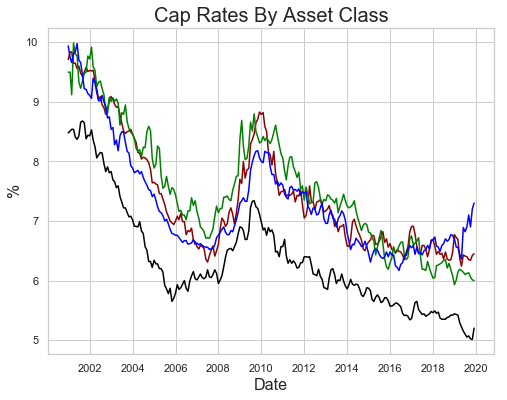

In [10]:
plt.figure(figsize = (8, 6))
plt.title("Cap Rates By Asset Class", fontsize=20)
plt.plot(cap_rates['O'], label='Office', c='darkred')
plt.plot(cap_rates['I'], label='Industrial', c='green')
plt.plot(cap_rates['R'], label='Retail', c='blue')
plt.plot(cap_rates['M'], label='MF', c='black')
plt.xlabel('Date', fontsize=16)
plt.ylabel('%', fontsize=16)

## PropTech Has Been Around for a Long Time

## Old
* Blake Eagle and National Council of Real Estate Investment Fiduciaries (NCREIF)
* Bob White and Real Capital Analytics (RCA)
* Ray Torto and Bill Wheaton of Torto Wheaton Research (now CBRE Econometric Advisors)
* CoStar

## New
* Cherie
* Reonomy
* VTS
* Zillow

## What Is Driving the Explosion of PropTech?

* Liquidity and the reach for yield
* The need for accuracy, granularity and timeliness of data
* The failure of old platforms to stay current
* COVID

## If I Can Do This...

In [7]:
covid = pd.read_csv('https://covidtracking.com/api/us/daily.csv')
covid['date'] = pd.to_datetime(covid['date'], format='%Y%m%d')
covid = covid.sort_values('date')
covid['rate'] = covid['positive'] / covid['posNeg'] * 100
covid = covid.iloc[79:]
covid['growth'] = covid['totalTestResultsIncrease'].pct_change(periods=1) * 100

Text(0, 0.5, 'Count')

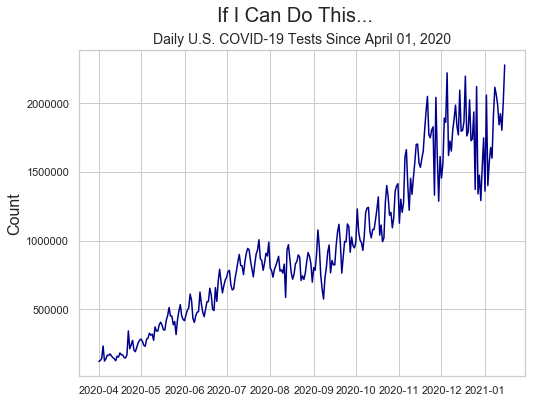

In [8]:
plt.figure(figsize=(8, 6))
plt.suptitle('If I Can Do This...', fontsize=20)
plt.title('Daily U.S. COVID-19 Tests Since April 01, 2020', fontsize=14)
plt.plot(covid['date'], covid['totalTestResultsIncrease'], color='darkblue')
plt.ylabel('Count', fontsize=16)

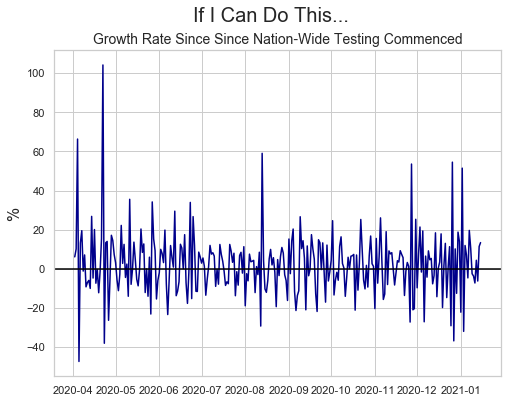

In [9]:
plt.figure(figsize=(8, 6))
plt.suptitle('If I Can Do This...', fontsize=20)
plt.title('Growth Rate Since Since Nation-Wide Testing Commenced', fontsize=14)
plt.plot(covid['date'], covid['growth'], color='darkblue')
plt.ylabel('%', fontsize=16)
plt.axhline(0, color="black")

# Thank You

## Q&A